## Аналитика в авиакомпании 'F9'

Краткое описание данных:

query_1:
    
    model — модели самолета
    flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года
    
query_3:  

    city — городах
    average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

### Шаг 4. Аналитика средствами Python


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

- Загружаемые таблицы представляют собой данные о среднем количестве рейсов в день, прибывающих в город city в августе 2018 года и данные о количестве рейсов для каждой модели самолетов, за тот же период.

In [2]:
try:
    df1=pd.read_csv('C:\projects\query_1.csv')
    df2=pd.read_csv('C:\projects\query_3.csv')
except:
    df1=pd.read_csv(r'/datasets/query_1.csv')
    df2=pd.read_csv(r'/datasets/query_3.csv')

In [3]:
for i in [df1,df2]:
    print(i)
    print('-------------------------------------------')
    i.info()
    print('___________________________________________')

                 model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
___________________________________________
               city  average_flights
0            Абакан         3.870968
1           Анадырь         1.000000
2             Анапа         2.161290
3       Архангельск         5.354839
4         Астрахань         2.451613
..              ...              ...
96             Чита         1.580645
97           Элиста         4.870968
98

 - Предобработка данных не требуется, тк пропусков не обнаружено, типы данных так же корректны. 
 - В таблице с моделями самолетов, заметна существенная разница в столбце количества полетов, причиной такой особенности данных моет быть, что airbus и boing являются крупными судами из чего следует:
     - не каждая частная компания может позволить себе приобретение и обслуживание подобного судна, поэтому малых судов, просто больше.
     - перелеты на большие расстояния и сервесное обслуживание в аэропорту занимают больше времени, тогда как мелкие судна могут летать горазда чаще.

#### топ-10 городов по количеству рейсов и популярность самолетных моделей.

               city  average_flights
43           Москва       129.774194
70  Санкт-Петербург        31.161290
54      Новосибирск        17.322581
33       Красноярск        11.580645
20     Екатеринбург        11.322581
67   Ростов-на-Дону        10.193548
63            Пермь        10.129032
10           Брянск        10.000000
74             Сочи         9.612903
84        Ульяновск         9.580645


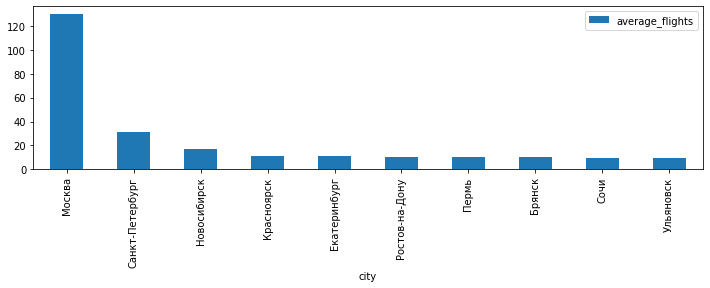

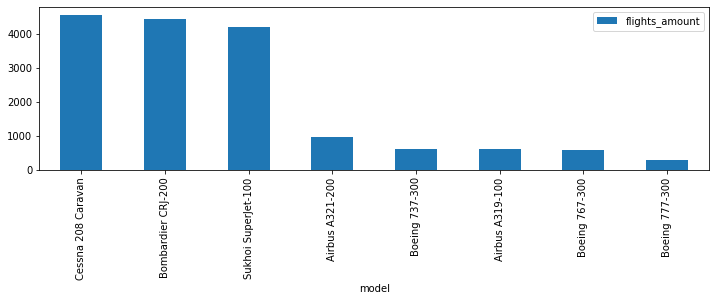

In [4]:
top_races = df2.sort_values('average_flights', ascending=False).head(10)
print(top_races)
top_races.plot.bar(x='city',figsize=(12,3))
plt.show()
df1.sort_values('flights_amount', ascending=False).plot.bar(x='model',figsize=(12,3))

### Вывод:

- Из диаграммы ТОПа городов по количеству рейсов:

    - Самым популярным городом в количестве рейсов за месяц, в августе 2018 года является Москва. (август - конец отпусков, как никак)  Если не брать во внимание, что Москва является столицей, она также имеет интернациональные рейсы, поэтому для других городов страны, столица может быть пересадочным пунктом для курортных или деловых рейсов.
    - Если рассматривать в рамках страны то Москва будет скорей являться перегруженным выбросом и первенство среди переферийных от столицы городов возьмет Санкт-Петербург.
    
    
- Из диаграммы популярности самолетных моделей:

    - Самолеты с малых размеров и небольшим количеством мест в сравнением с моделями airbus и boing, используются в авиации гораздо чаще, чем крупные лайнеры. Это позволяет совершать дешевые перелеты, как на короткие так и впролне на сапостовимые расстояния гораздо чаще.

# Общий вывод:
1. Используя данные, спарсенные с сайта https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html о проводимых вестивалях и SQL запросы данных авиакомпаний, явной зависимости между проведением фестиваля и количеством купленных билетов на самолет не обнаружено. Однако в сравнении с соседними неделями, когда фестивали не проводятся, количество билетов незначительно занижено (от 300 до 8000), вполне возможно, что участники феста организовываются и берут в аренду атобус, это предположение требует дльнейшего, более подробного анализа и вполне вероятно на этом можно сформировать целевое предложение. 
2. Из анализа остальных данных можно сказать, что предпочтения пассажиров, отдано мелким судам(а они выбирают!?) и чаще всего используются аэропорты Москвы для совершения перелетов.
3. Для более подробного анализа следует провести аналитику для топа аэропортов и выявить популярные направления перелета и необходимоть крупных или мелких судов.